## Import Library dan load dataset

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
import numpy as np
# Ignore all warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("datafullori_cleaned2.csv")
df.head(20)

,Id,tanggal,tweet_clean,retweet,token,stop,stemmed
0,1.660000e+18,13/05/2023,SeaGamesFT Indonesia Vietnam Komang Nguyen ...,4414,"['SeaGamesFT', 'Indonesia', 'Vietnam', 'Komang...","['SeaGamesFT', 'Indonesia', 'Vietnam', 'Komang...","['seagamesft', 'indonesia', 'vietnam', 'komang..."
1,1.660000e+18,13/05/2023,Goal Taufany yang mengantarkan Indonesia ke fi...,1141,"['Goal', 'Taufany', 'yang', 'mengantarkan', 'I...","['Goal', 'Taufany', 'mengantarkan', 'Indonesia...","['goal', 'taufany', 'antar', 'indonesia', 'fin..."
2,1.660000e+18,11/5/2023,Mens Team FINALINA MASPramudya Kusumawardana...,807,"['Mens', 'Team', 'FINALINA', 'MASPramudya', 'K...","['Mens', 'Team', 'FINALINA', 'MASPramudya', 'K...","['mens', 'team', 'finalina', 'maspramudya', 'k..."
3,1.660000e+18,14/05/2023,Pertandingan semi final Indonesia vs Vietnam ...,2,"['Pertandingan', 'semi', 'final', 'Indonesia',...","['Pertandingan', 'semi', 'final', 'Indonesia',...","['tanding', 'semi', 'final', 'indonesia', 'vs'..."
4,1.660000e+18,14/05/2023,Ketua umum PSSI Makan siang bersama pemain t...,1,"['Ketua', 'umum', 'PSSI', 'Makan', 'siang', 'b...","['Ketua', 'umum', 'PSSI', 'Makan', 'siang', 'b...","['ketua', 'umum', 'pssi', 'makan', 'siang', 's..."
5,1.660000e+18,14/05/2023,SahaginFinal FantasyFamicom,11,"['SahaginFinal', 'FantasyFamicom']","['SahaginFinal', 'FantasyFamicom']","['sahaginfinal', 'fantasyfamicom']"
6,1.660000e+18,14/05/2023,Indonesia lolos dramatis ke final SEA Games ...,92,"['Indonesia', 'lolos', 'dramatis', 'ke', 'fina...","['Indonesia', 'lolos', 'dramatis', 'final', 'S...","['indonesia', 'lolos', 'dramatis', 'final', 's..."
7,1.660000e+18,14/05/2023,Lolos ke Final Indra Sjafri Puji Anak Asuhnya ...,0,"['Lolos', 'ke', 'Final', 'Indra', 'Sjafri', 'P...","['Lolos', 'Final', 'Indra', 'Sjafri', 'Puji', ...","['lolos', 'final', 'indra', 'sjafri', 'puji', ..."
8,1.660000e+18,14/05/2023,Momen gol yang dicetak Muhammad Taufany pada ...,427,"['Momen', 'gol', 'yang', 'dicetak', 'Muhammad'...","['Momen', 'gol', 'dicetak', 'Muhammad', 'Taufa...","['momen', 'gol', 'cetak', 'muhammad', 'taufany..."
9,1.660000e+18,14/05/2023,Saking respeknya di final bahkan setelah kala...,274,"['Saking', 'respeknya', 'di', 'final', 'bahkan...","['Saking', 'respeknya', 'final', 'bahkan', 'ka...","['saking', 'respek', 'final', 'bahkan', 'kalah..."


## Menghitung TF-IDF

In [3]:
# Mengambil isi atribut "stemmed" dari dataset sebagai dokumen
documents = df['stemmed'].tolist()

# Inisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan proses fitting dan transformasi pada data teks
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Mendapatkan daftar kata kunci yang digunakan sebagai fitur
feature_names = tfidf_vectorizer.get_feature_names_out()

# Mendapatkan matriks TF-IDF
tfidf_matrix_array = tfidf_matrix.toarray()

# Membuat DataFrame untuk menampung informasi
data = []
for i, word in enumerate(feature_names):
    tf = tfidf_matrix_array[:, i].sum()  # Menghitung nilai TF
    idf = tfidf_vectorizer.idf_[i]  # Menghitung nilai IDF
    tf_idf = tf * idf  # Menghitung nilai TF-IDF
    data.append([i+1, word, tf, idf, tf_idf])

columns = ['Nomor', 'Kata', 'TF', 'IDF', 'TF-IDF']
df_tfidf = pd.DataFrame(data, columns=columns)


# Mengurutkan DataFrame berdasarkan kolom 'TF-IDF' secara menurun
df_tfidf_sorted = df_tfidf.sort_values(by='TF-IDF', ascending=False)

# Menampilkan data dari nilai TF-IDF yang paling besar hingga paling kecil
df_tfidf_sorted.head()

,Nomor,Kata,TF,IDF,TF-IDF
1557,1558,indonesia,51.889558,2.090738,108.487482
4116,4117,timnas,53.925045,1.985848,107.086966
524,525,bola,45.831480,2.267897,103.941060
3615,3616,sepak,42.662162,2.359002,100.640135
3516,3517,sea,40.702766,2.455852,99.959972


## Menghitung Rata-Rata TF-IDF

In [4]:
# Menghitung rata-rata nilai TF-IDF
rata2_tfidf = df_tfidf['TF-IDF'].mean()

# Menampilkan rata-rata TF-IDF
print("Rata-rata TF-IDF:", rata2_tfidf)

Rata-rata TF-IDF: 5.506637268484698


## Permodelan dengan K-Means dan Perhitungan Skor Silhouette

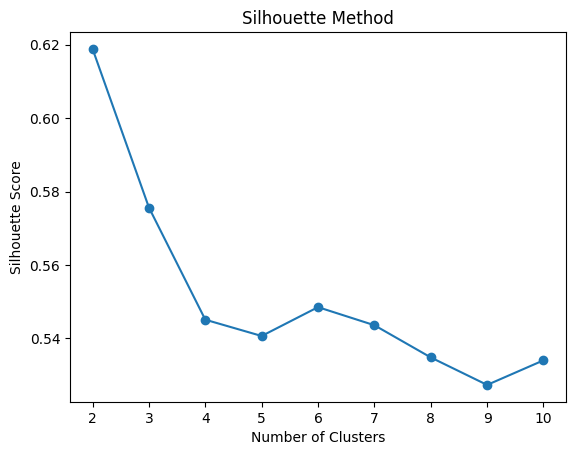

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy

# Normalisasi matriks TF-IDF
normalized_tfidf = normalize(tfidf_matrix)

# Menentukan rentang jumlah klaster yang akan diuji
max_clusters = 10
cluster_range = range(2, max_clusters + 1)

# Inisialisasi list untuk menyimpan skor Silhouette setiap klaster
silhouette_scores = []

# Melakukan K-means clustering untuk setiap jumlah klaster
for n_clusters in cluster_range:
    # Membuat objek KMeans dengan jumlah klaster yang diinginkan
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10, max_iter=1000)
    
    # Mengalikan matriks TF-IDF dengan bobot
    weighted_tfidf = normalized_tfidf * df_tfidf['TF-IDF'].values.reshape(-1, 1)

    # Melakukan proses clustering pada matriks TF-IDF yang telah diberi bobot
    kmeans.fit(weighted_tfidf)
    
    # Mendapatkan label klaster untuk setiap dokumen
    labels = kmeans.labels_
    
    # Menghitung skor Silhouette
    silhouette_avg = silhouette_score(weighted_tfidf, labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan plot Silhouette untuk melihat skor Silhouette setiap klaster
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


## Display skor Silhoutte berdasarkan jumlah cluster

In [6]:
# Membuat DataFrame untuk menyimpan hasil skor Silhouette
results_df = pd.DataFrame({'Jumlah Cluster': cluster_range, 'Silhouette Score': silhouette_scores})

# Menampilkan tabel hasil skor Silhouette
display(results_df)

,Jumlah Cluster,Silhouette Score
0,2,0.618838
1,3,0.575631
2,4,0.545085
3,5,0.540645
4,6,0.548504
5,7,0.543579
6,8,0.534810
7,9,0.527319
8,10,0.534016


## Penggunaan model K-Means n-2

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

# Normalisasi matriks TF-IDF
normalized_tfidf = normalize(tfidf_matrix)

# Menentukan jumlah klaster yang diinginkan
n_clusters = 2

# Membuat objek KMeans dengan jumlah klaster yang diinginkan
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Mengalikan matriks TF-IDF dengan bobot
weighted_tfidf = normalized_tfidf * df_tfidf['TF-IDF'].values.reshape(-1, 1)

# Melakukan proses clustering pada matriks TF-IDF yang telah diberi bobot
kmeans.fit(weighted_tfidf)

# Mendapatkan label klaster untuk setiap dokumen
labels = kmeans.labels_ + 1

# Menambahkan kolom 'Cluster' pada DataFrame
df['Cluster'] = labels

# Menampilkan hasil klastering
print(df[['tweet_clean', 'Cluster']])

                                            tweet_clean  Cluster
0     SeaGamesFT  Indonesia  Vietnam Komang  Nguyen ...        2
1     Goal Taufany yang mengantarkan Indonesia ke fi...        1
2     Mens Team  FINALINA  MASPramudya Kusumawardana...        2
3      Pertandingan semi final Indonesia vs Vietnam ...        1
4      Ketua umum PSSI  Makan siang bersama pemain t...        1
...                                                 ...      ...
1259   Timnas Indonesia akhirnya kebobolan di SEA Ga...        1
1260    Sewanya JIS sih oke tapi aksesnya ampun neti...        2
1261  Prabowo Bertemu Waketum PSSI Bahas Rencana Keb...        1
1262          ngapain timnas ditonton maju kagak goblok        2
1263   Oh gitu ya  Bro  Kalo analisaku gak meleset  ...        2

[1264 rows x 2 columns]


## Save ke file csv

In [8]:
df.to_csv('datahasilcluster.csv', index=False)

## Contoh menampilkan isi 2 cluster

In [9]:
# Menampilkan data pada kluster 1
cluster_1_data = df[df['Cluster'] == 1]['tweet_clean']
print("Data pada Kluster 1:")
print(cluster_1_data.head())

# Menampilkan data pada kluster 2
cluster_2_data = df[df['Cluster'] == 2]['tweet_clean']
print("\nData pada Kluster 2:")
print(cluster_2_data.head())

Data pada Kluster 1:
1    Goal Taufany yang mengantarkan Indonesia ke fi...
3     Pertandingan semi final Indonesia vs Vietnam ...
4     Ketua umum PSSI  Makan siang bersama pemain t...
6     Indonesia lolos dramatis ke final SEA Games  ...
8     Momen gol yang dicetak Muhammad Taufany pada ...
Name: tweet_clean, dtype: object

Data pada Kluster 2:
0    SeaGamesFT  Indonesia  Vietnam Komang  Nguyen ...
2    Mens Team  FINALINA  MASPramudya Kusumawardana...
5                         SahaginFinal FantasyFamicom 
7    Lolos ke Final Indra Sjafri Puji Anak Asuhnya ...
9     Saking respeknya di final bahkan setelah kala...
Name: tweet_clean, dtype: object


## Display scatter plot hasil clustering

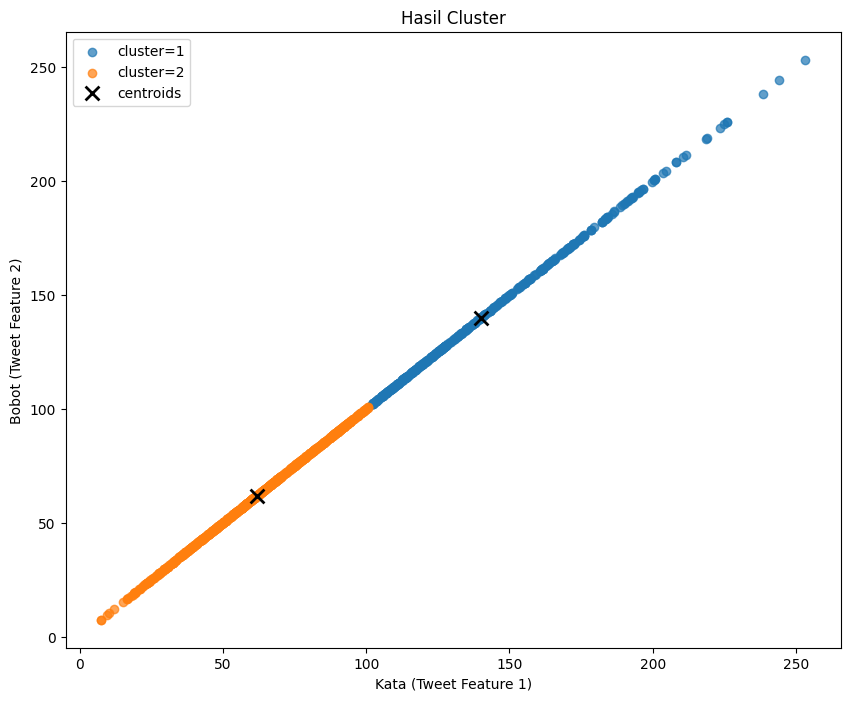

In [10]:
# Plotting the clusters
plt.figure(figsize=(10, 8))

for c in np.unique(labels):
    plt.scatter(weighted_tfidf[labels == c, 0],
                weighted_tfidf[labels == c, 0], label='cluster=' + str(c), alpha=.7)

# Plotting centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 0], marker='x',
            s=100, linewidths=2, color='k', label='centroids')

# # Get the words for feature 1
# feature_1_words = vectorizer.get_feature_names()

# # Plotting the words as annotations
# for i, txt in enumerate(feature_1_words):
#     plt.annotate(txt, (weighted_tfidf[i, 0], weighted_tfidf[i, 0]))

plt.title("Hasil Cluster")
plt.xlabel("Kata (Tweet Feature 1)")
plt.ylabel("Bobot (Tweet Feature 2)")
plt.legend()
plt.show()


## Memilih beberapa atribut dan save ke file csv

In [11]:
df_cluster1 = df.loc[df['Cluster'] == 1, ['Id', 'tanggal', 'tweet_clean', 'retweet', 'Cluster']]
df_cluster1.to_csv('datahasilcluster=1.csv', index=False)
df_cluster2 = df.loc[df['Cluster'] == 2, ['Id', 'tanggal', 'tweet_clean', 'retweet', 'Cluster']]
df_cluster2.to_csv('datahasilcluster=2.csv', index=False)

## Analisis Sentimen Cluster 1 dengan lexicon

In [21]:
# Baca leksikon negatif
lexicon_negative = pd.read_csv('negative.tsv', sep='\t')
lexicon_negative.columns = ['word', 'weight']
lexicon_negative['weight'] = lexicon_negative['weight'].astype(float)

# Baca leksikon positif
lexicon_positive = pd.read_csv('positive.tsv', sep='\t')
lexicon_positive.columns = ['word', 'weight']
lexicon_positive['weight'] = lexicon_positive['weight'].astype(float)

# Membuat kolom sentimen pada DataFrame
df_cluster1['Sentimen'] = ''

# Menghitung sentimen berdasarkan leksikon
for index, row in df_cluster1.iterrows():
    words = row['tweet_clean'].split()
    sentiment_score = 0
    
    for word in words:
        if word in lexicon_positive['word'].values:
            sentiment_score += lexicon_positive.loc[lexicon_positive['word'] == word, 'weight'].values[0]
        elif word in lexicon_negative['word'].values:
            sentiment_score += lexicon_negative.loc[lexicon_negative['word'] == word, 'weight'].values[0]
    
    if sentiment_score > 0:
        df_cluster1.at[index, 'Sentimen'] = 'Positive'
    elif sentiment_score < 0:
        df_cluster1.at[index, 'Sentimen'] = 'Negative'
    else:
        df_cluster1.at[index, 'Sentimen'] = 'Neutral'

# Menampilkan hasil sentimen
print(df_cluster1[['tweet_clean', 'Cluster', 'Sentimen']])


                                            tweet_clean  Cluster  Sentimen
1     Goal Taufany yang mengantarkan Indonesia ke fi...        1  Negative
3      Pertandingan semi final Indonesia vs Vietnam ...        1  Positive
4      Ketua umum PSSI  Makan siang bersama pemain t...        1  Positive
6      Indonesia lolos dramatis ke final SEA Games  ...        1  Positive
8      Momen gol yang dicetak Muhammad Taufany pada ...        1  Positive
...                                                 ...      ...       ...
1250  Timnas Voli Putra Diguyur Bonus Usai Hattrick ...        1   Neutral
1255   Emas No SEA Games Terbanyak dari timnas voli ...        1  Negative
1257  Beckham Putra jadi penentu kemenangan Timnas I...        1  Negative
1259   Timnas Indonesia akhirnya kebobolan di SEA Ga...        1   Neutral
1261  Prabowo Bertemu Waketum PSSI Bahas Rencana Keb...        1   Neutral

[450 rows x 3 columns]


In [13]:
sentimen_counts = df_cluster1['Sentimen'].value_counts()
dominant_sentimen = sentimen_counts.idxmax()

print("Atribut sentimen yang dominan: ", dominant_sentimen)
print("Jumlah sentimen:")
print(sentimen_counts)


Atribut sentimen yang dominan:  Negative
Jumlah sentimen:
Sentimen
Negative    167
Neutral     162
Positive    121
Name: count, dtype: int64


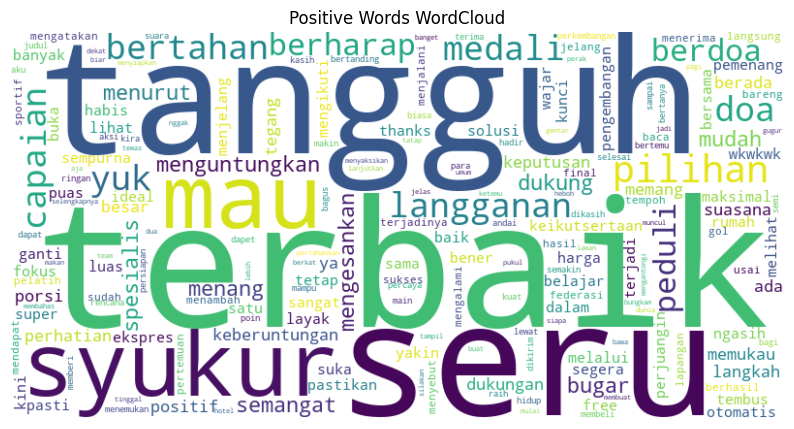

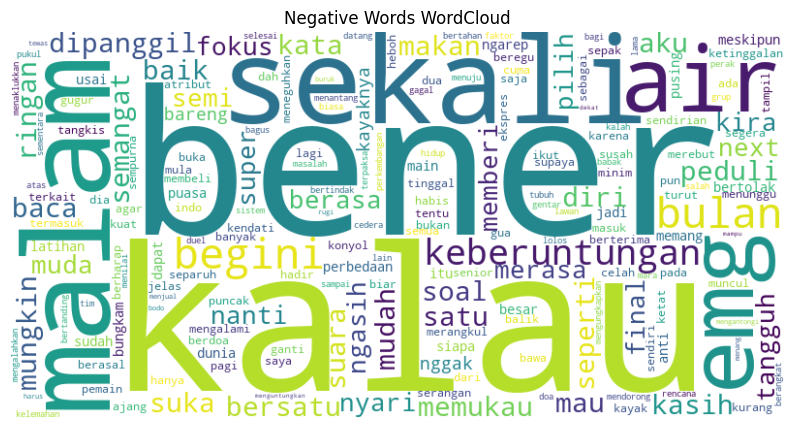

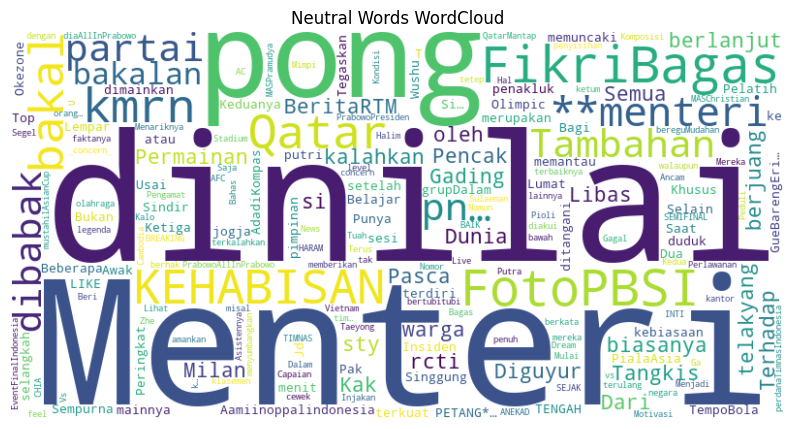

In [30]:
from wordcloud import WordCloud

# Membaca file negative.tsv dan positive.tsv
negative_df = pd.read_csv('negative.tsv', sep='\t')
positive_df = pd.read_csv('positive.tsv', sep='\t')

# Menggabungkan kata-kata dari kedua file menjadi satu set kata
negative_words = set(negative_df['word'])
positive_words = set(positive_df['word'])

# Membuat set kata dari kolom 'tweet_clean' pada df_cluster1
cluster1_words = set(df_cluster1['tweet_clean'].str.split().explode())

# Mengidentifikasi kata yang ada di kedua file dan di df_cluster1
common_words = cluster1_words.intersection(negative_words.union(positive_words))
neutral_words = cluster1_words - common_words

# Mengambil weight untuk kata-kata yang ada di file negative.tsv dan positive.tsv
negative_common_weights = negative_df[negative_df['word'].isin(common_words)]
positive_common_weights = positive_df[positive_df['word'].isin(common_words)]

# Membuat WordCloud untuk kata-kata positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(positive_common_weights['word'], positive_common_weights['weight']))
)

# Membuat WordCloud untuk kata-kata negatif
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(negative_common_weights['word'], negative_common_weights['weight']))
)

# Membuat WordCloud untuk kata-kata netral
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(neutral_words, [1] * len(neutral_words)))
)

# Menampilkan WordCloud
plt.figure(figsize=(10, 6))
plt.axis('off')
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Words WordCloud')

plt.figure(figsize=(10, 6))
plt.axis('off')
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Words WordCloud')

plt.figure(figsize=(10, 6))
plt.axis('off')
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Words WordCloud')

plt.show()


# Analisis Sentimen Cluster 2 dengan lexicon

In [32]:
# Baca leksikon negatif
lexicon_negative = pd.read_csv('negative.tsv', sep='\t')
lexicon_negative.columns = ['word', 'weight']
lexicon_negative['weight'] = lexicon_negative['weight'].astype(float)

# Baca leksikon positif
lexicon_positive = pd.read_csv('positive.tsv', sep='\t')
lexicon_positive.columns = ['word', 'weight']
lexicon_positive['weight'] = lexicon_positive['weight'].astype(float)

# Membuat kolom sentimen pada DataFrame
df_cluster2['Sentimen'] = ''

# Menghitung sentimen berdasarkan leksikon
for index, row in df_cluster2.iterrows():
    words = row['tweet_clean'].split()
    sentiment_score = 0
    
    for word in words:
        if word in lexicon_positive['word'].values:
            sentiment_score += lexicon_positive.loc[lexicon_positive['word'] == word, 'weight'].values[0]
        elif word in lexicon_negative['word'].values:
            sentiment_score += lexicon_negative.loc[lexicon_negative['word'] == word, 'weight'].values[0]
    
    if sentiment_score > 0:
        df_cluster2.at[index, 'Sentimen'] = 'Positive'
    elif sentiment_score < 0:
        df_cluster2.at[index, 'Sentimen'] = 'Negative'
    else:
        df_cluster2.at[index, 'Sentimen'] = 'Neutral'

# Menampilkan hasil sentimen
print(df_cluster2[['tweet_clean', 'Cluster', 'Sentimen']])


                                            tweet_clean  Cluster  Sentimen
0     SeaGamesFT  Indonesia  Vietnam Komang  Nguyen ...        2   Neutral
2     Mens Team  FINALINA  MASPramudya Kusumawardana...        2   Neutral
5                          SahaginFinal FantasyFamicom         2   Neutral
7     Lolos ke Final Indra Sjafri Puji Anak Asuhnya ...        2   Neutral
9      Saking respeknya di final bahkan setelah kala...        2  Negative
...                                                 ...      ...       ...
1256  ERICKTHOHIRNEWS  Rencana Besar Erick Thohir Ba...        2   Neutral
1258   Enggak yang Womens barusan aja selesai seming...        2  Negative
1260    Sewanya JIS sih oke tapi aksesnya ampun neti...        2  Positive
1262          ngapain timnas ditonton maju kagak goblok        2  Negative
1263   Oh gitu ya  Bro  Kalo analisaku gak meleset  ...        2  Positive

[814 rows x 3 columns]


In [33]:
sentimen_counts = df_cluster2['Sentimen'].value_counts()
dominant_sentimen = sentimen_counts.idxmax()

print("Atribut sentimen yang dominan: ", dominant_sentimen)
print("Jumlah sentimen:")
print(sentimen_counts)

Atribut sentimen yang dominan:  Positive
Jumlah sentimen:
Sentimen
Positive    325
Negative    309
Neutral     180
Name: count, dtype: int64


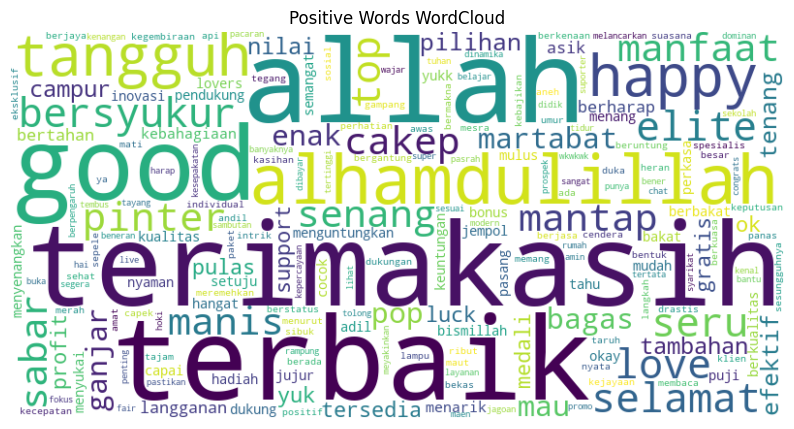

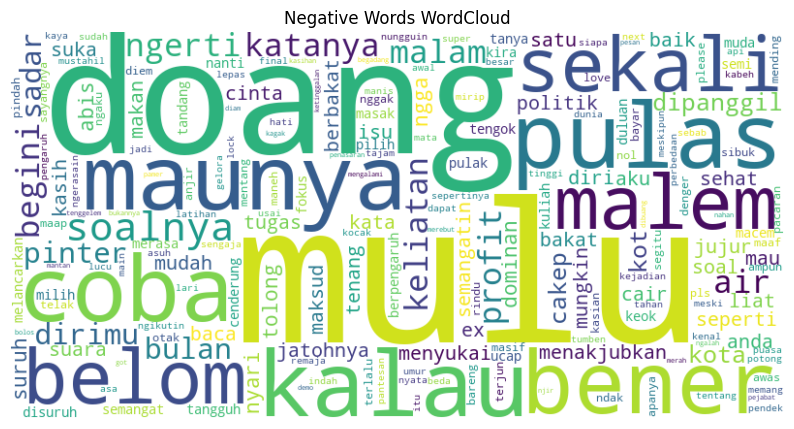

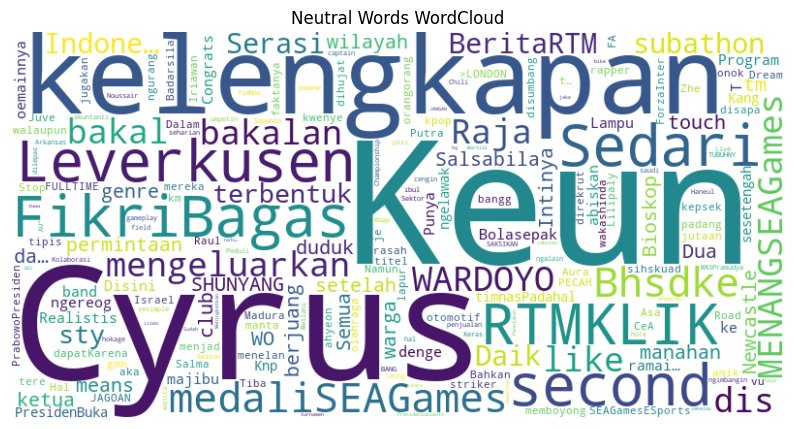

In [35]:
from wordcloud import WordCloud

# Membuat set kata dari kolom 'tweet_clean' pada df_cluster1
cluster2_words = set(df_cluster2['tweet_clean'].str.split().explode())

# Mengidentifikasi kata yang ada di kedua file dan di df_cluster1
common_words2 = cluster2_words.intersection(negative_words.union(positive_words))
neutral_words2 = cluster2_words - common_words2

# Mengambil weight untuk kata-kata yang ada di file negative.tsv dan positive.tsv
negative_common_weights2 = negative_df[negative_df['word'].isin(common_words2)]
positive_common_weights2 = positive_df[positive_df['word'].isin(common_words2)]

# Membuat WordCloud untuk kata-kata positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(positive_common_weights2['word'], positive_common_weights2['weight']))
)

# Membuat WordCloud untuk kata-kata negatif
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(negative_common_weights2['word'], negative_common_weights2['weight']))
)

# Membuat WordCloud untuk kata-kata netral
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(neutral_words2, [1] * len(neutral_words2)))
)

# Menampilkan WordCloud
plt.figure(figsize=(10, 6))
plt.axis('off')
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Words WordCloud')

plt.figure(figsize=(10, 6))
plt.axis('off')
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Words WordCloud')

plt.figure(figsize=(10, 6))
plt.axis('off')
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Words WordCloud')

plt.show()


## Menampilkan hasil sentimen 

In [36]:
# Membuat kolom "Sentimen" dengan nilai awal 'Unknown'
df['Sentimen'] = 'Unknown'

# Mengubah nilai sentimen berdasarkan nilai Cluster
df.loc[df['Cluster'] == 1, 'Sentimen'] = 'Pos-Neg'
df.loc[df['Cluster'] == 2, 'Sentimen'] = 'Neg-Neu'

# Menampilkan DataFrame dengan kolom "Sentimen"
print(df[['tweet_clean', 'Cluster', 'Sentimen']])


                                            tweet_clean  Cluster Sentimen
0     SeaGamesFT  Indonesia  Vietnam Komang  Nguyen ...        2  Neg-Neu
1     Goal Taufany yang mengantarkan Indonesia ke fi...        1  Pos-Neg
2     Mens Team  FINALINA  MASPramudya Kusumawardana...        2  Neg-Neu
3      Pertandingan semi final Indonesia vs Vietnam ...        1  Pos-Neg
4      Ketua umum PSSI  Makan siang bersama pemain t...        1  Pos-Neg
...                                                 ...      ...      ...
1259   Timnas Indonesia akhirnya kebobolan di SEA Ga...        1  Pos-Neg
1260    Sewanya JIS sih oke tapi aksesnya ampun neti...        2  Neg-Neu
1261  Prabowo Bertemu Waketum PSSI Bahas Rencana Keb...        1  Pos-Neg
1262          ngapain timnas ditonton maju kagak goblok        2  Neg-Neu
1263   Oh gitu ya  Bro  Kalo analisaku gak meleset  ...        2  Neg-Neu

[1264 rows x 3 columns]


## Save file ke csv 

In [ ]:
df_akhir = df[['Id', 'tanggal', 'tweet_clean', 'retweet', 'Cluster', 'Sentimen']]

In [ ]:
df_akhir.to_csv('datahasilakhir.csv', index=False)